In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cd /content/drive/MyDrive/"Colab Notebooks"/DeepLearningImplementation/Deep-Learning

!git config --global user.email 'helloiamkenny@gmail.com'
!git config --global user.name '99kenny'

# VGGNet
- dataset : CIFAR-10

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras import optimizers


ImportError: ignored

In [5]:
# download data
cifar10 = tf.keras.datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# split data -> validation, test
valid_images, valid_labels = test_images[0:5000,:], test_labels[0:5000,:]
test_images, test_labels = test_images[5000:,:], test_labels[5000:,:]

print(valid_images.shape)
print(test_images.shape)

(5000, 32, 32, 3)
(5000, 32, 32, 3)


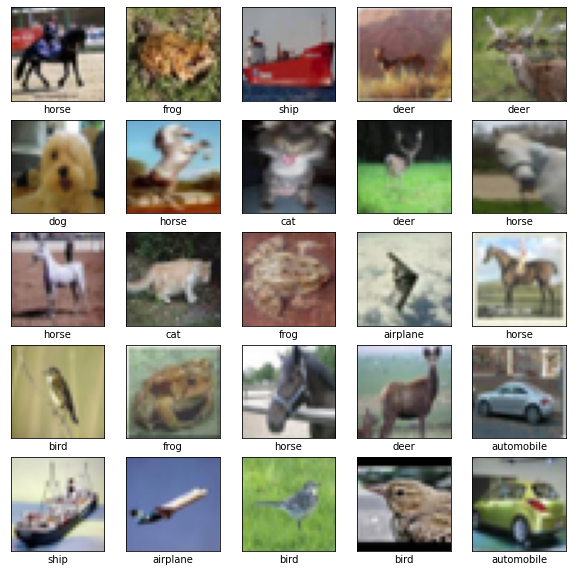

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [31]:
img_rows, img_cols = 32, 32
img_channels = 3 

img_dim = (img_rows, img_cols, img_channels)  
img_input = Input(shape=img_dim)
def vgg_model_A():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation = 'softmax')(x)
  return x

def vgg_model_A_LRN():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 


  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation = 'softmax')(x)
  return x

def vgg_model_B():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) 
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 


  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation = 'softmax')(x)
  return x

def vgg_model_C():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) 
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 


  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(1,1),padding='same',activation = 'relu')(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(1,1),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(1,1),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation = 'softmax')(x)
  return x

def vgg_model_D():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) 
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 


  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation = 'softmax')(x)
  return x

def vgg_model_E():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) 
  x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 


  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 

  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation = 'softmax')(x)
  return x

model_A = Model(inputs=img_input, outputs = vgg_model_A())
model_B = Model(inputs=img_input, outputs = vgg_model_B())
model_C = Model(inputs=img_input, outputs = vgg_model_C())
model_D = Model(inputs=img_input, outputs = vgg_model_D())
model_E = Model(inputs=img_input, outputs = vgg_model_E())
models = [model_A, model_B, model_C, model_D, model_E]

# Train

In [32]:
for model in models:
  model.compile(optimizer='Adam', 
                loss='sparse_categorical_crossentropy', metrics=['accuracy','sparse_top_k_categorical_accuracy'])

  #loss를 categorical_crossentropy 대신 sparse_categorical_crossentropy 사용

  from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
  learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                              patience=5, 
                                              verbose=1, 
                                              factor=0.1, 
                                              min_lr=0.00001)

  hist = model.fit(train_images, train_labels, epochs=15,
            validation_data=(valid_images, valid_labels),callbacks = [learning_rate_reduction],batch_size=256)

Epoch 1/15
196/196 [==============================] - 13s 64ms/step - loss: 2.6565 - accuracy: 0.1166 - sparse_top_k_categorical_accuracy: 0.5303 - val_loss: 2.2983 - val_accuracy: 0.1354 - val_sparse_top_k_categorical_accuracy: 0.5560 - lr: 0.0010
Epoch 2/15
196/196 [==============================] - 12s 62ms/step - loss: 1.8535 - accuracy: 0.2678 - sparse_top_k_categorical_accuracy: 0.8155 - val_loss: 1.5085 - val_accuracy: 0.4286 - val_sparse_top_k_categorical_accuracy: 0.9114 - lr: 0.0010
Epoch 3/15
196/196 [==============================] - 12s 63ms/step - loss: 1.3690 - accuracy: 0.4957 - sparse_top_k_categorical_accuracy: 0.9299 - val_loss: 1.2393 - val_accuracy: 0.5712 - val_sparse_top_k_categorical_accuracy: 0.9402 - lr: 0.0010
Epoch 4/15
196/196 [==============================] - 12s 64ms/step - loss: 1.0944 - accuracy: 0.6108 - sparse_top_k_categorical_accuracy: 0.9573 - val_loss: 1.0428 - val_accuracy: 0.6400 - val_sparse_top_k_categorical_accuracy: 0.9562 - lr: 0.0010
Epoc

# Test

In [33]:
result = []
for index,model in enumerate(models):
  test_loss, test_acc, test_sparse_top_k_categorical_accuracy = model.evaluate(test_images,test_labels)
  result.append([test_acc,test_sparse_top_k_categorical_accuracy])
  print("model_", chr(index+65))
  print('test loss:', test_loss)
  print('top-1 test error : ', (1 - test_acc)*100)
  print('top-5 test error : ',(1 - test_sparse_top_k_categorical_accuracy)*100)

157/157 [==============================] - 1s 8ms/step - loss: 1.3501 - accuracy: 0.7578 - sparse_top_k_categorical_accuracy: 0.9706
model_ A
test loss: 1.3500550985336304
top-1 test error :  24.220001697540283
top-5 test error :  2.9399991035461426
157/157 [==============================] - 1s 8ms/step - loss: 1.4127 - accuracy: 0.7612 - sparse_top_k_categorical_accuracy: 0.9742
model_ B
test loss: 1.4127448797225952
top-1 test error :  23.879998922348022
top-5 test error :  2.5799989700317383
157/157 [==============================] - 1s 9ms/step - loss: 0.9588 - accuracy: 0.7932 - sparse_top_k_categorical_accuracy: 0.9800
model_ C
test loss: 0.9588032364845276
top-1 test error :  20.67999839782715
top-5 test error :  1.9999980926513672
157/157 [==============================] - 2s 10ms/step - loss: 0.9257 - accuracy: 0.7408 - sparse_top_k_categorical_accuracy: 0.9668
model_ D
test loss: 0.9257226586341858
top-1 test error :  25.919997692108154
top-5 test error :  3.320002555847168
1

In [55]:
outputs.shape

TensorShape([5000, 1000])

# Ensemble

In [66]:
y1 = models[1].predict(test_images)
y2 = models[2](test_images)
outputs = tf.keras.layers.average([y1, y2])

e1 = tf.keras.metrics.sparse_categorical_accuracy(
    test_labels, outputs
)

e2 = tf.keras.metrics.sparse_top_k_categorical_accuracy(
    test_labels, outputs, k=5
)

print("top-1 error: ", (1 - (np.count_nonzero(e1 == 1) / 5000)) * 100)
print("top-5 error: ", (1 - (np.count_nonzero(e2 == 1) / 5000)) * 100)

157/157 [==============================] - 1s 7ms/step
top-1 error:  19.279999999999998
top-5 error:  1.5000000000000013


# Git push

In [46]:

%cd /content/drive/MyDrive/"Colab Notebooks"/DeepLearningImplementation/Deep-Learning
!ls
!git add .
!git commit -m "feat: vgg A~E"
!git push origin main


/content/drive/MyDrive/Colab Notebooks/DeepLearningImplementation/Deep-Learning
README.md  VGGNet.ipynb
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
